In [1]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Data (preparing and loading)

# Create known parameters
weight = 0.65
bias = 0.23

# Creating dataset

start = 0
end =1
step=0.002
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0020],
         [0.0040],
         [0.0060],
         [0.0080],
         [0.0100],
         [0.0120],
         [0.0140],
         [0.0160],
         [0.0180]]),
 tensor([[0.2300],
         [0.2313],
         [0.2326],
         [0.2339],
         [0.2352],
         [0.2365],
         [0.2378],
         [0.2391],
         [0.2404],
         [0.2417]]))

In [3]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(X)

(400, 100, 500)

In [4]:
# Visualization of data 
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

def plot_predictions(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    predictions=None):
    """
    Plots training data, test data and compares predictions,
    """

    plt.figure(figsize=(10,7))

    #PLot training data in blue
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

    #Plot test data in green
    plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

    #Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    #Show the legend
    plt.legend(prop={"size": 14})

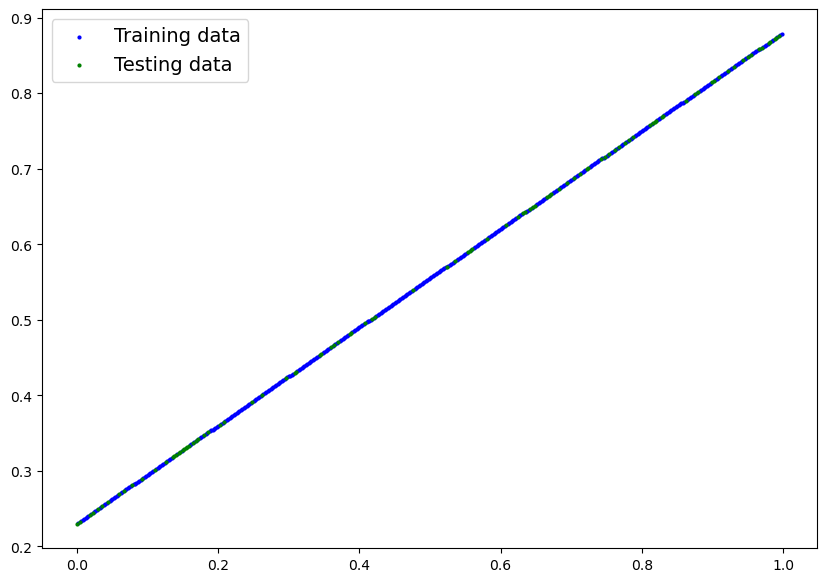

In [5]:
plot_predictions()

In [6]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                requires_grad=True,
                                dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [7]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
# Making prediction using torch.inference_mode()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds[:10]

tensor([[0.3719],
        [0.1780],
        [0.3807],
        [0.2332],
        [0.1988],
        [0.3941],
        [0.3827],
        [0.2123],
        [0.1746],
        [0.4318]])

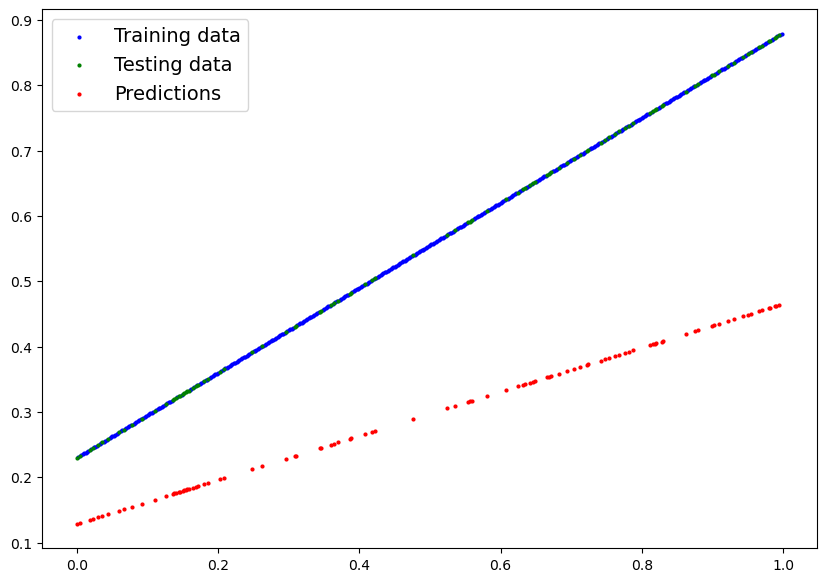

In [10]:
plot_predictions(predictions=y_preds)

In [11]:
# Setup a loss function
loss_fn = nn.L1Loss()

#Set up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)

In [12]:
# Building a training loop (and a testing loop)
epochs = 500

#track different values
epoch_count = []
loss_value = []
test_loss_values = []

### TRAINING ###

# Loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train()

    # Forward pass
    y_pred = model_0(X_train)
    
    # Calculate the loss
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
   
    model_0.eval() 
    with torch.inference_mode():
        # Forward pass
        test_pred = model_0(X_test)

        # Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 50 == 0:
        epoch_count.append(epoch)
        loss_value.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        
        # Print out model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.25660941004753113 | Test loss: 0.24868912994861603
OrderedDict([('weights', tensor([0.3417])), ('bias', tensor([0.1388]))])
Epoch: 50 | Loss: 0.03470684587955475 | Test loss: 0.04031142219901085
OrderedDict([('weights', tensor([0.5088])), ('bias', tensor([0.3052]))])
Epoch: 100 | Loss: 0.011791126802563667 | Test loss: 0.0133299445733428
OrderedDict([('weights', tensor([0.6033])), ('bias', tensor([0.2549]))])
Epoch: 150 | Loss: 0.0021263230592012405 | Test loss: 0.010444048792123795
OrderedDict([('weights', tensor([0.6426])), ('bias', tensor([0.2234]))])
Epoch: 200 | Loss: 0.0021263230592012405 | Test loss: 0.010444048792123795
OrderedDict([('weights', tensor([0.6426])), ('bias', tensor([0.2234]))])
Epoch: 250 | Loss: 0.0021263230592012405 | Test loss: 0.010444048792123795
OrderedDict([('weights', tensor([0.6426])), ('bias', tensor([0.2234]))])
Epoch: 300 | Loss: 0.0021263230592012405 | Test loss: 0.010444048792123795
OrderedDict([('weights', tensor([0.6426])), ('bia

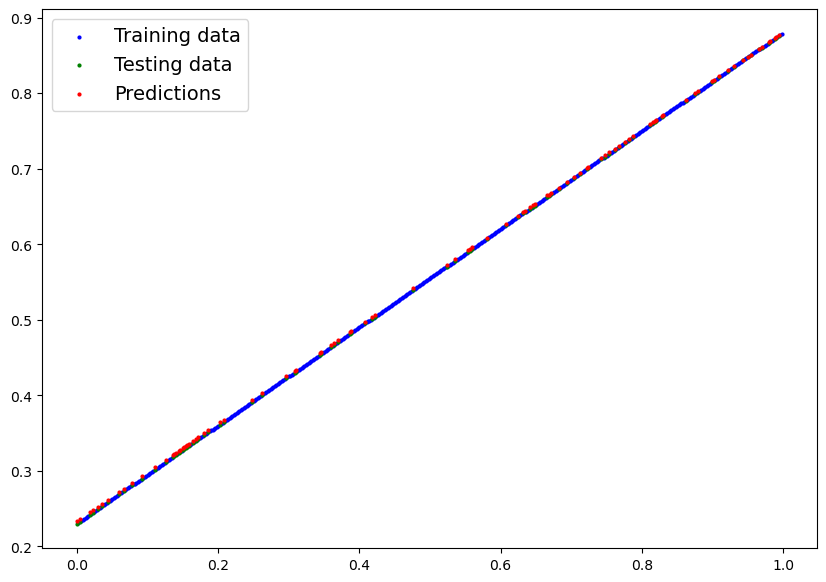

In [13]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

In [14]:
from pathlib import Path

# 1. Create model directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


In [15]:
# Instantiating a new instance of our model class to load our model
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict for model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

C:\Users\shobh\AppData\Local\Temp\ipykernel_18260\4111596452.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH)

<All keys matched successfully>

In [16]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6475])), ('bias', tensor([0.2334]))])